# Ridge Histogram Plots
from unidentified sources

### Import Libraries

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
from tqdm import tqdm_notebook
import tqdm
import seaborn as sns
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="whitegrid")
from IPython.display import Markdown as md
%load_ext autoreload
%autoreload 2

In [6]:
d_name = 'none' 
m_name = 'lightGBM'
def get_data(d_name = 'none' , m_name = 'lightGBM'):
    train_df = pd.read_csv(f'temp_res_comp/train_prob/{d_name}_{m_name}.csv' , )
    u_df = pd.read_csv(f'temp_res_comp/unid_prob/{m_name}_{d_name}.csv' , )
    #train_df = pd.read_csv(f'temp_res_comp/train_prob/{d_name}_{m_name}.csv' ,)
    #u_df = pd.read_csv(f'temp_res_comp/unid-non-var-prob/{m_name}_{d_name}.csv' , )
    classes = ['AGN' ,'YSO' ,'STAR' ,'HMXB' ,'LMXB' ,'ULX' ,'CV' ,'PULSAR']
    return train_df , u_df , classes 
d_name = 'none'
m_name = 'lightGBM'
train_df , u_df , classes = get_data(d_name , m_name)

### ROC-AUC curve

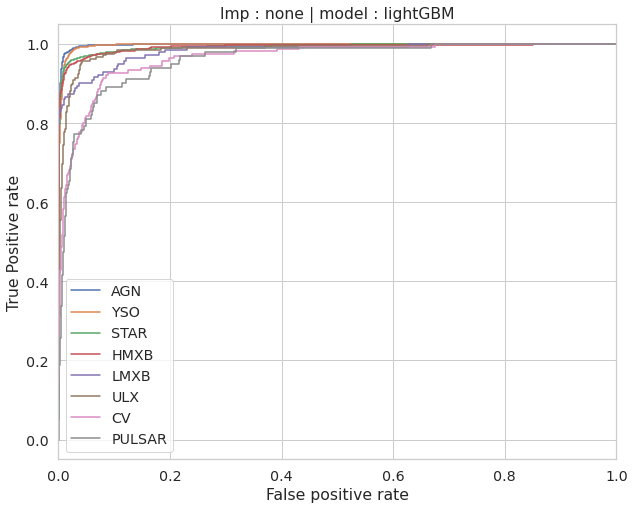

In [32]:
from sklearn.metrics import roc_curve
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(10,8))
fpr , tpr , th = {} ,{} ,{}
sns.set_palette('tab10')
for cl in classes:
#cl = 'ULX'
    temp_res = train_df.copy()
    temp_res['true_class']  = [1 if el==cl else 0 for el in temp_res['true_class']]
    fpr , tpr , th = roc_curve(temp_res['true_class'] , temp_res[f'prob_{cl}'] , )
    ax.plot(fpr,tpr , label=cl)
    ax.set_xlim(0,1)
plt.ylabel('True Positive rate')
plt.xlabel('False positive rate')
plt.title(f'Imp : {d_name} | model : {m_name}')
plt.legend()
plt.savefig(f'temp_res_comp/roc-auc/{d_name}_{m_name}.png')
plt.show()

### Confusion Matrix

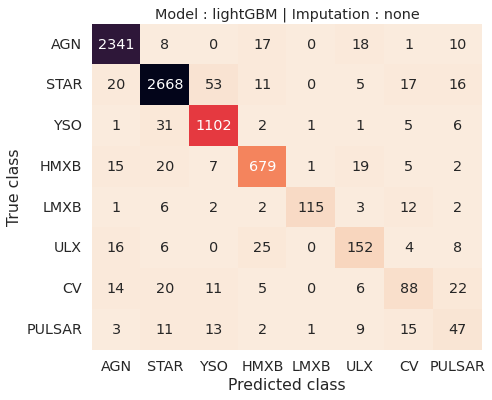

In [33]:
from utilities import plot_cf
plot_dict_def = {
    'title' : False , 
    'font_scale' : 1.2 ,
    'cbar' : False ,
    'plot_num' : 0,
}
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(7,6))
plot_cf([train_df] , plot_dict=plot_dict_def , confidance=0. , ax=ax , normalize=None)
plt.title(f'Model : {m_name} | Imputation : {d_name}')
#plt.savefig(f'temp_res_comp/cf/{m_name}_{d_name}.png')
plt.savefig(f'final_plots/CF_lightGBM.eps' , format='eps')
plt.show()

### Scores

In [34]:
from utilities import get_score
score = get_score([train_df])
score

{'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
       dtype=object),
 'num_src':         pred_class
 STAR          2770
 AGN           2411
 YSO           1188
 HMXB           743
 ULX            213
 CV             147
 LMXB           118
 PULSAR         113,
 'avg_scores': {'balanced_accuracy': 0.7900770340081565,
  'accuracy': 0.933662209528755,
  'precision': 0.9338492531882773,
  'recall': 0.933662209528755,
  'f1': 0.9334927905901085},
 'mcc': 0.9101974995301222,
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.977453         0.970966  0.974199
 CV          0.530120         0.598639  0.562300
 HMXB        0.907754         0.913863  0.910798
 LMXB        0.804196         0.974576  0.881226
 PULSAR      0.465347         0.415929  0.439252
 STAR        0.956272         0.963177  0.959712
 ULX         0.720379         0.713615  0.716981
 YSO         0.959095         0.927

### Train Data pred Histogram

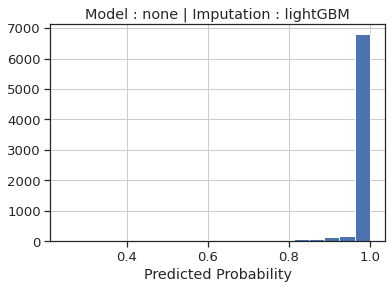

In [35]:
plt.hist(train_df['pred_prob'] , bins=20)
plt.title(f'Model : {d_name} | Imputation : {m_name}')
plt.xlabel('Predicted Probability')
plt.savefig(f'temp_res_comp/train_prob_dist/{d_name}_{m_name}.jpg')
plt.show()

### Unidentified sources

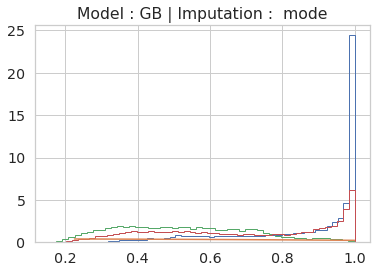

In [12]:
import scipy.stats as stats

noise = np.random.normal(0, 1, (1000, ))
density = stats.gaussian_kde(noise)

d_name = 'none'
m_name = 'lightGBM'
train_df , u_df , classes = get_data(d_name , m_name)
n, x, _ = plt.hist(u_df['prob'], histtype=u'step', density=True , bins=50)  
plt.plot(x, density(x))
# x ,y ,z = plt.hist(u_df['prob'] ,bins=50)
d_name = 'mode'
m_name = 'RF'
train_df , u_df , classes = get_data(d_name , m_name)
x ,y ,z = plt.hist(u_df['prob'] ,bins=50 , histtype=u'step', density=True)
d_name = 'mode'
m_name = 'GB'
train_df , u_df , classes = get_data(d_name , m_name)
x ,y ,z = plt.hist(u_df['prob'] ,bins=50 , histtype=u'step', density=True ,)
plt.title(f'Model : {m_name} | Imputation :  {d_name}')
#plt.savefig(f'temp_res_comp/unid_prob_dist_combined/{m_name}_{d_name}.png')
plt.show()

In [37]:
mode = y[np.argmax(x)]
mode

0.9845091862044508

In [38]:
u_df_num = u_df['class'].value_counts().to_frame()
u_df_num = pd.concat([
                u_df['class'].value_counts() ,
                u_df[u_df['prob']>0.5]['class'].value_counts(),
                #u_df[u_df['prob']>0.6]['class'].value_counts(),
                #u_df[u_df['prob']>0.7]['class'].value_counts(),
                #u_df[u_df['prob']>0.8]['class'].value_counts(),
                u_df[u_df['prob']>0.9]['class'].value_counts(),
                #u_df[u_df['prob']>mode]['class'].value_counts(),
                #u_df[u_df['prob']>0.98]['class'].value_counts(),
                 ] , axis=1)
u_df_num.columns = ['Argmax' ,'0.5' ,'0.9' ,]
u_df_num.index.name = 'class'
#u_df_num.to_csv(f'temp_res_comp/unid_num/{d_name}_{m_name}.csv')
u_df_num.append(u_df_num.sum() , ignore_index=True)
print(u_df_num.to_markdown())

| class   |   Argmax |   0.5 |   0.9 |
|:--------|---------:|------:|------:|
| AGN     |    11250 | 10661 |  7541 |
| STAR    |    10585 | 10173 |  7387 |
| YSO     |     9027 |  8896 |  6399 |
| HMXB    |     3289 |  2914 |  1412 |
| ULX     |     2318 |  2004 |   678 |
| CV      |     1841 |  1505 |   504 |
| PULSAR  |     1396 |  1095 |   295 |
| LMXB    |      187 |   181 |   157 |


In [39]:
from numpy.random import normal
from ridgeplot import ridgeplot
cl = classes[::-1]
sample = [u_df[u_df['class']==c]['prob'] for c in cl]

In [40]:
fig = ridgeplot(
    samples=sample,
    kde_points=np.linspace(0, 1, 500),
    colorscale="inferno",
    colormode="index",
    coloralpha=0.6,
    labels=cl,
    spacing = 3 / 8,
    xpad=0
)
fig.update_layout(
    title=f"Unidentified sources | Imputation : {d_name} | classifier : {m_name}",
    height=550,
    width=600,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    xaxis_title="Predicted Probability",
    yaxis_title="Predicted Probability Density",
)

#fig.save('temp.png')
#fig.write_image(f'temp_res_comp/unid_prob_dist/{m_name}_{d_name}.jpg')
#fig.write_image(f'temp_res_comp/unid_prob_dist/{m_name}_{d_name}_v2.jpg')
fig.show()

# Divide file in chunks

In [1]:
import joblib
import numpy as np 
import pandas as pd

In [2]:
focal = joblib.load('../not_on_git/focal_tune_dict_v2.pkl')
l = len(focal)
print(l)

500


In [5]:
chunk = 20 
s = int(l /chunk)
s

25

In [6]:
for i in range(chunk):
    temp = focal[i*s:(i+1)*s]
    joblib.dump(temp , f'focal_loss/chunk_{i}.pkl' , compress=3)

In [7]:
focal[0]

{'param': {'alpha': 0.026272763772753296, 'gamma': 0.0},
 'res': {'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
        dtype=object),
  'num_src':         pred_class
  STAR          2849
  AGN           2462
  YSO           1200
  HMXB           739
  ULX            175
  CV             127
  LMXB           118
  PULSAR          33,
  'balanced_accuracy': 0.7296262245779286,
  'accuracy': 0.9244450214202259,
  'precision': 0.8171835797909276,
  'recall': 0.7296262245779286,
  'f1': 0.7598950569434924,
  'class_scores':         recall_score  precision_score  f1_score
  class                                          
  AGN         0.978706         0.952071  0.965205
  CV          0.536145         0.700787  0.607509
  HMXB        0.881016         0.891746  0.886348
  LMXB        0.769231         0.932203  0.842912
  PULSAR      0.158416         0.484848  0.238806
  STAR        0.959857         0.939979  0.949814
  ULX         0.597156         0.720000  0

In [33]:
focal[0]

{'param': {'alpha': 0.026272763772753296, 'gamma': 0.0},
 'res': {'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
        dtype=object),
  'num_src':         pred_class
  STAR          2849
  AGN           2462
  YSO           1200
  HMXB           739
  ULX            175
  CV             127
  LMXB           118
  PULSAR          33,
  'balanced_accuracy': 0.7296262245779286,
  'accuracy': 0.9244450214202259,
  'precision': 0.8171835797909276,
  'recall': 0.7296262245779286,
  'f1': 0.7598950569434924,
  'class_scores':         recall_score  precision_score  f1_score
  class                                          
  AGN         0.978706         0.952071  0.965205
  CV          0.536145         0.700787  0.607509
  HMXB        0.881016         0.891746  0.886348
  LMXB        0.769231         0.932203  0.842912
  PULSAR      0.158416         0.484848  0.238806
  STAR        0.959857         0.939979  0.949814
  ULX         0.597156         0.720000  0

In [44]:
from sklearn.metrics import matthews_corrcoef
from tqdm import tqdm 
#alpha , gamma  , precision , recall , f1 , acc , bal_acc = [] , [] ,[] , [],[],[],[]
recall_grid = []
precision_grid = [] 
mcc_grid = []
f1_grid = []
pulsar_recall = []
pulsar_f1 = []
pulsar_precision = []
for f in tqdm(focal):
    recall_grid.append([f['param']['alpha'] ,f['param']['gamma'] , f['res']["recall"] ])
    precision_grid.append([f['param']['alpha'] ,f['param']['gamma'] , f['res']["precision"] ])
    f1_grid.append([f['param']['alpha'] ,f['param']['gamma'] , f['res']["f1"] ])
    mcc = matthews_corrcoef(f['res']['res_table']['true_class'] ,f['res']['res_table']['true_class'])
    pulsar_recall.append([f['param']['alpha'] ,f['param']['gamma'] , f['res']['class_scores'].loc['PULSAR']['recall_score'] ])
    pulsar_precision.append([f['param']['alpha'] ,f['param']['gamma'] , f['res']['class_scores'].loc['PULSAR']['precision_score'] ])
    pulsar_f1.append([f['param']['alpha'] ,f['param']['gamma'] , f['res']['class_scores'].loc['PULSAR']['f1_score'] ])
    mcc_grid.append([f['param']['alpha'] , f['param']['gamma'] , mcc])

    #alpha.append(f['param']['alpha'])
    #gamma.append(f['param']['alpha'])

100%|██████████| 500/500 [00:10<00:00, 45.62it/s]


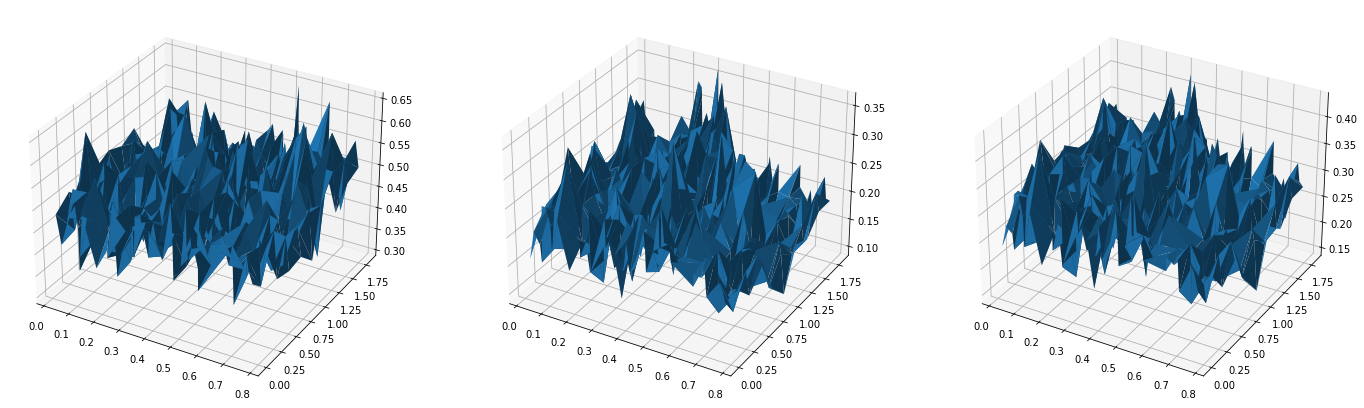

In [45]:

from matplotlib import pyplot as plt 
fig = plt.figure(figsize=(24,8))

to_plot = pulsar_precision
x = np.asarray([el[0] for el in to_plot])
y = np.asarray([el[1] for el in to_plot])
z = np.asarray([el[2] for el in to_plot])
ax = fig.add_subplot(131, projection='3d')
ax.plot_trisurf(x,y,z)

to_plot = pulsar_recall
x = np.asarray([el[0] for el in to_plot])
y = np.asarray([el[1] for el in to_plot])
z = np.asarray([el[2] for el in to_plot])
ax = fig.add_subplot(132, projection='3d')
ax.plot_trisurf(x,y,z)

to_plot = pulsar_f1
x = np.asarray([el[0] for el in to_plot])
y = np.asarray([el[1] for el in to_plot])
z = np.asarray([el[2] for el in to_plot])
ax = fig.add_subplot(133, projection='3d')
ax.plot_trisurf(x,y,z)

plt.show()